In [5]:

"""
descr Python时间序列分析
      https://www.machinelearningplus.com/time-series/time-series-analysis-python/
author LJ.Michale
date 2022-04
"""

'\ndescr Python时间序列分析\n      https://www.machinelearningplus.com/time-series/time-series-analysis-python/\nauthor LJ.Michale\ndate 2022-04\n'

In [4]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [7]:
# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [8]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [12]:
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


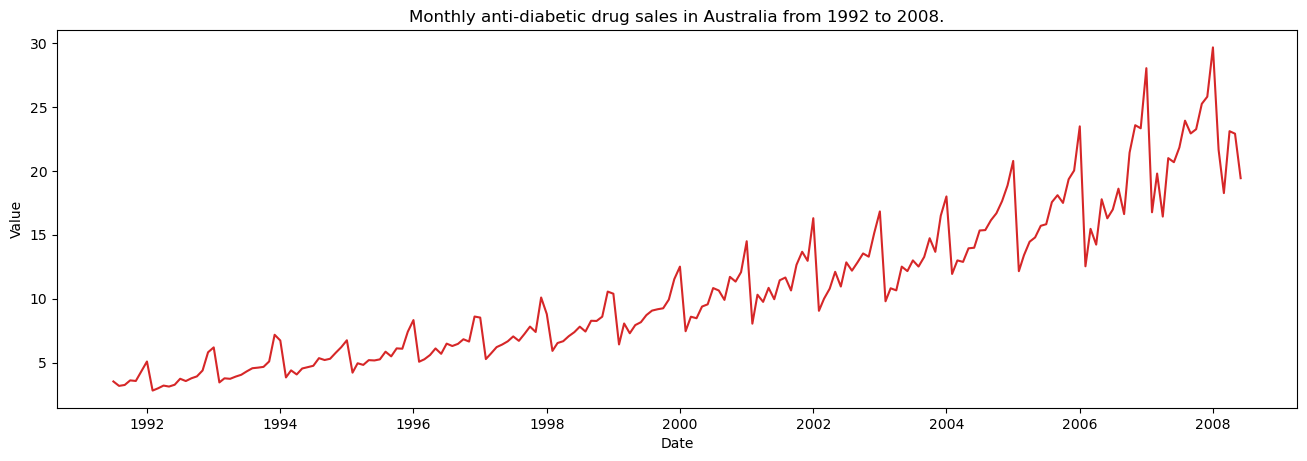

In [13]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

In [15]:
# # Import data
# df = pd.read_csv('datasets/AirPassengers.csv', parse_dates=['date'])
# x = df['date'].values
# y1 = df['value'].values

# # Plot
# fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
# plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
# plt.ylim(-800, 800)
# plt.title('Air Passengers (Two Side View)', fontsize=16)
# plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
# plt.show()

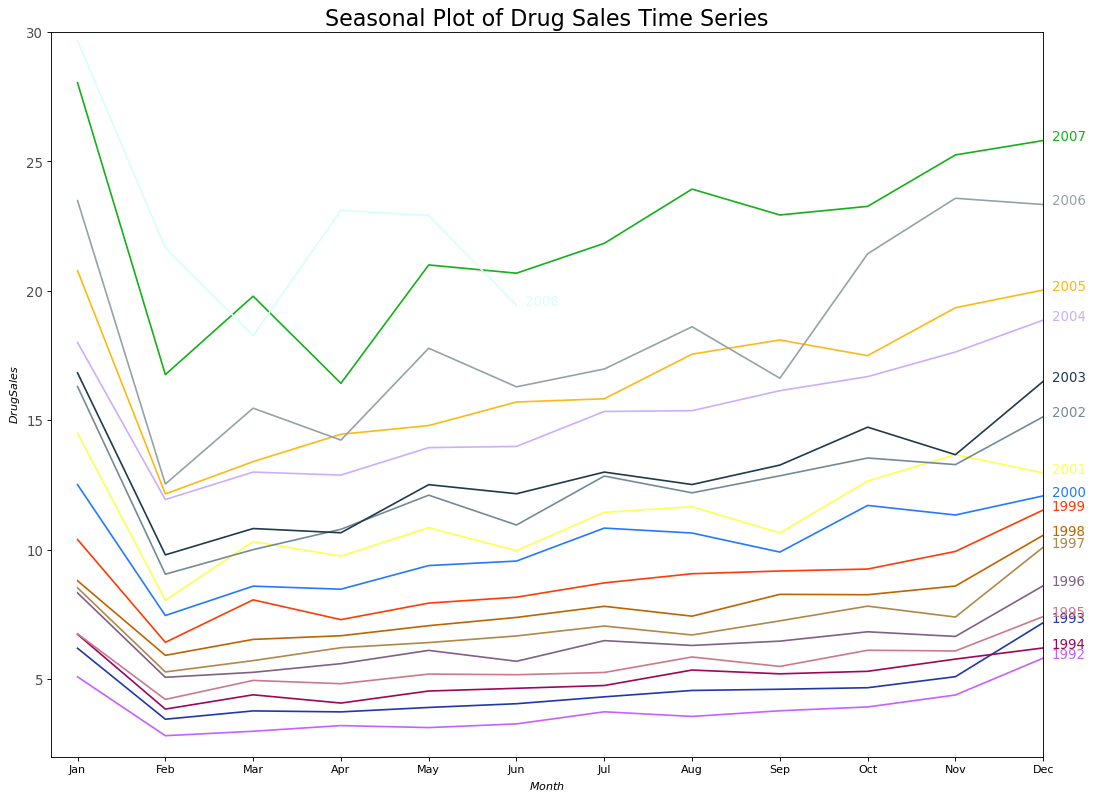

In [16]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [ ]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

In [2]:
# 7. 怎样分解时间序列的成分？
# 你可以通过将序列作基线水平，趋势，季节性指数和残差的加法或乘法组合来实现一个经典的时间序列分解。
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

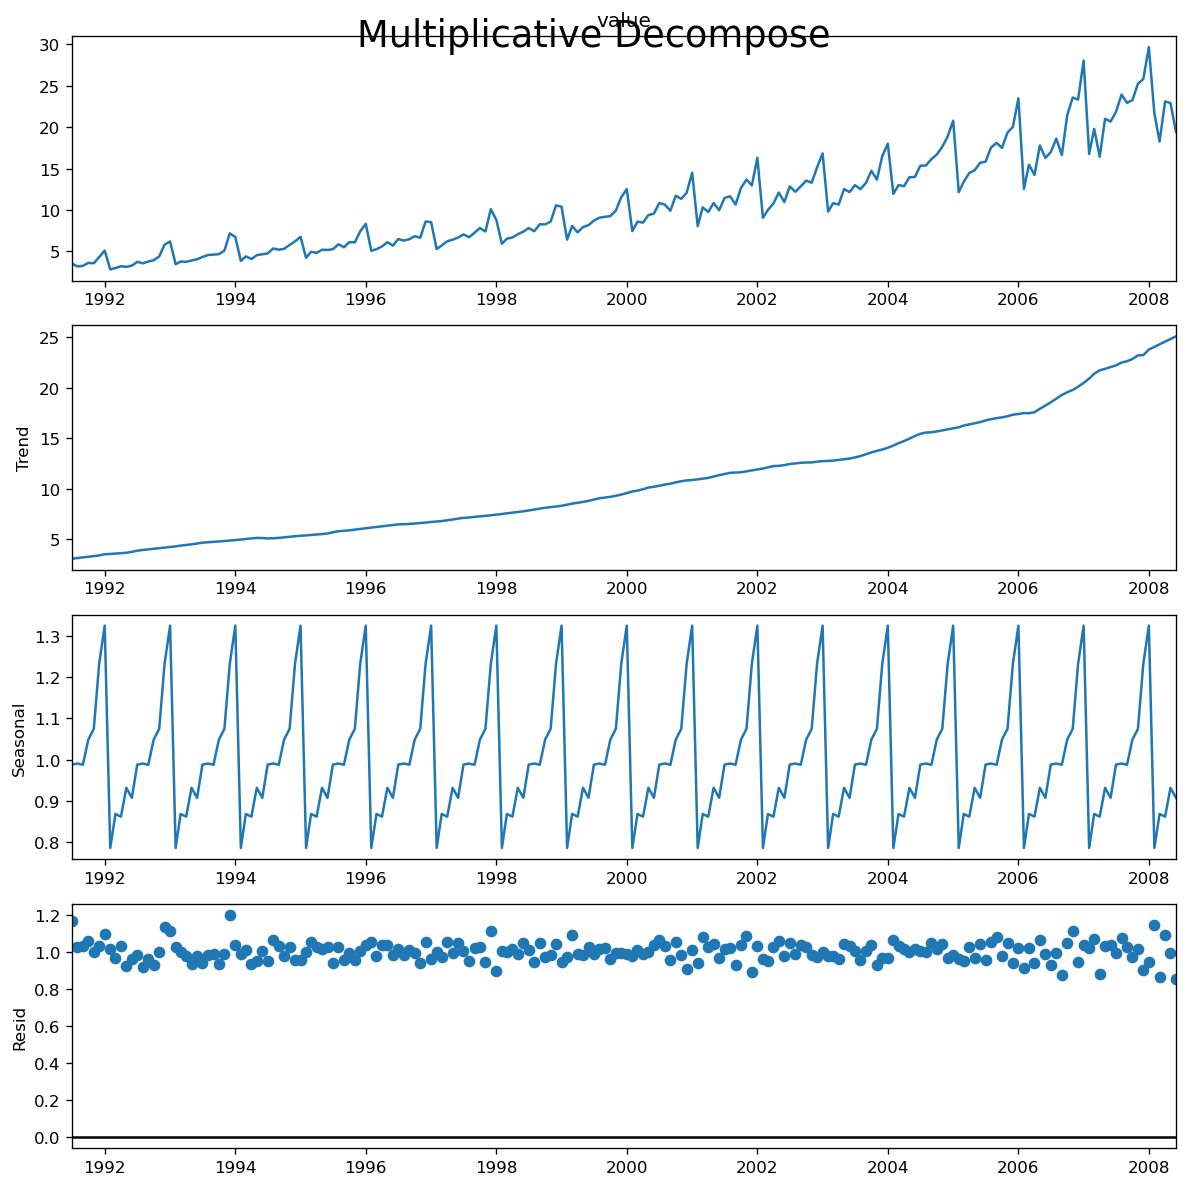

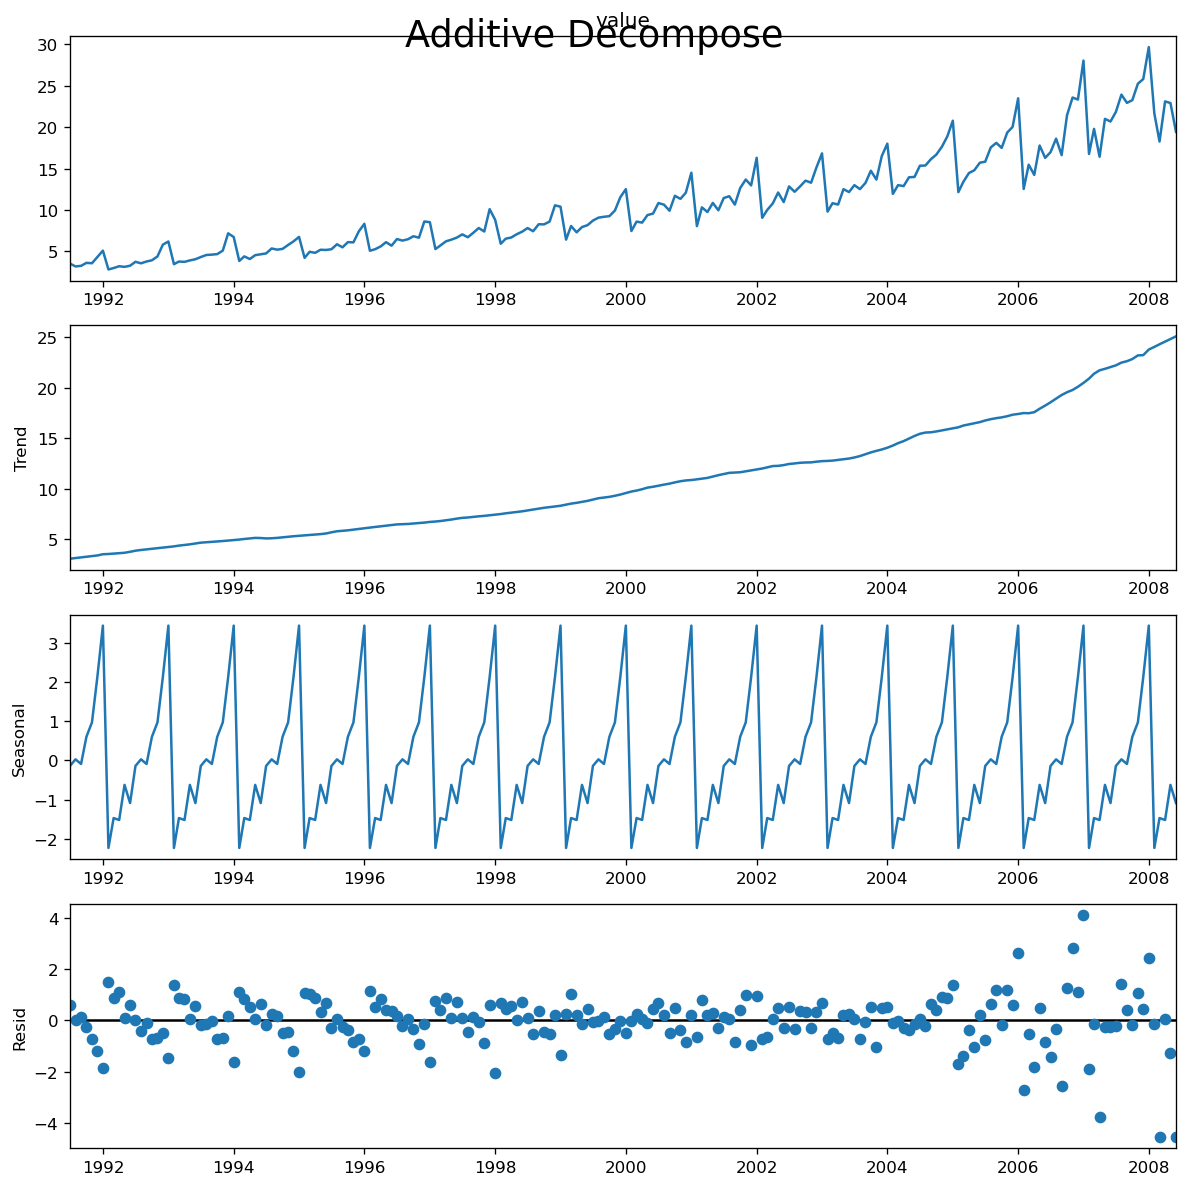

In [5]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
 
# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
 
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
 
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [6]:
"""
8. 平稳和非平稳时间序列
平稳性是时间序列的属性之一。平稳序列的值不是时间的函数。
也就是说，这种序列的统计属性例如均值，方差和自相关是随时间不变的常数。序列的自相关只是与前置值的相关，之后会详细介绍。
平稳时间序列也没有季节效应。
所以如何识别一个序列是否平稳呢？让我们通过实例来展示一下：
"""
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
 
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067363
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


D:\software\Anaconda\envs\data_analysis\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
D:\software\Anaconda\envs\data_analysis\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


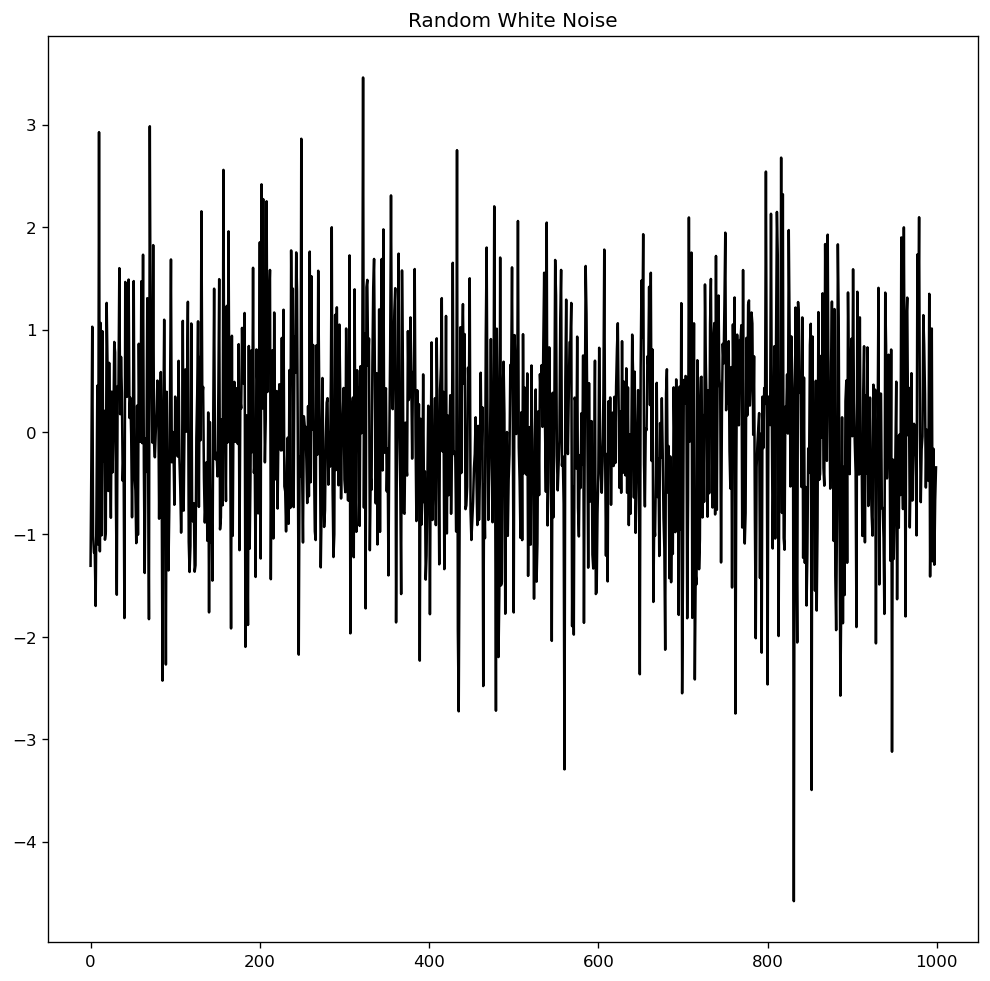

In [7]:
"""
11. 白噪音和平稳序列的差异是什么？
如平稳序列，白噪音也不是时间的函数，它的均值和方差并不随时间变化。但是它与平稳序列的差异在于，白噪音完全随机，均值为0。
无论怎样，在白噪音当中是没有特定模式的。如果你将FM广播的声音信号作为时间序列，你在频道之间的频段听到的空白声就是白噪音。
从数学上来看，均值为0的完全随机的数字序列是白噪音。
"""
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

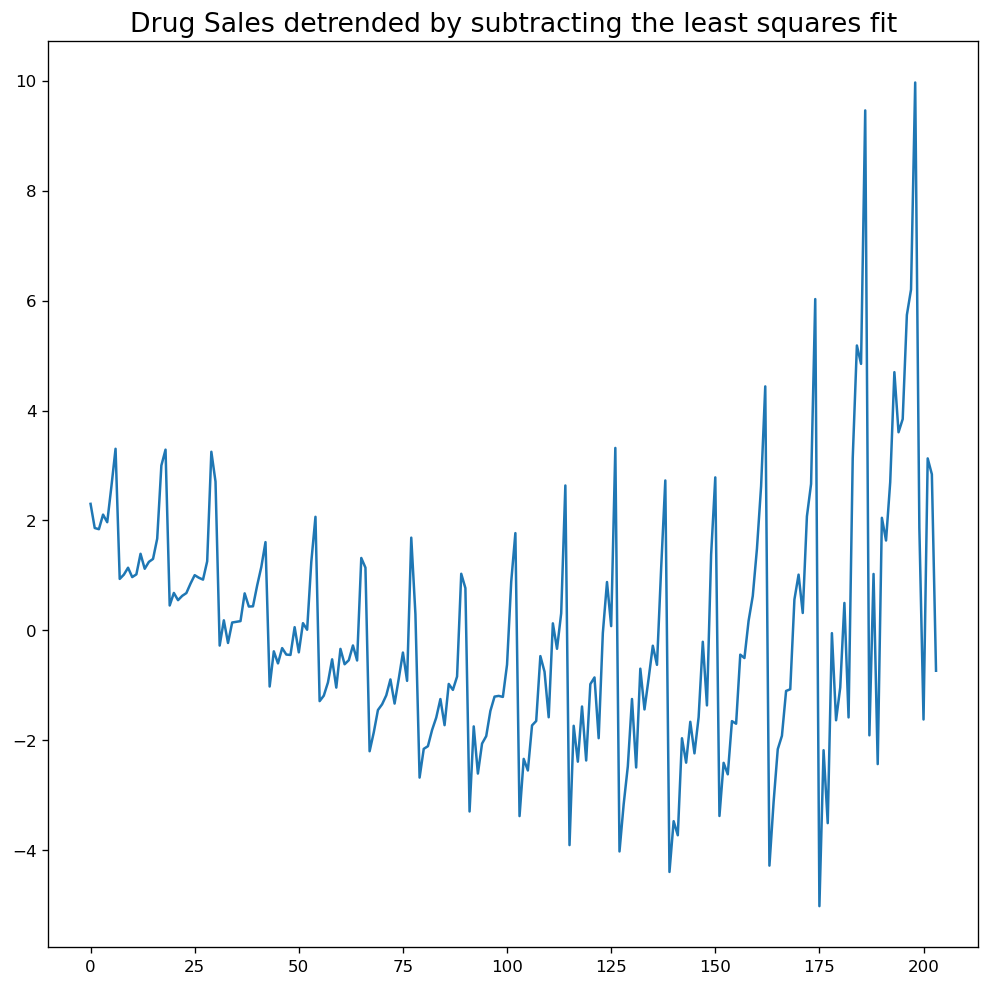

In [8]:
"""
12. 怎样将时间序列去趋势化？
对时间序列去趋势就是从时间序列当中移除趋势成分。但是如何提取趋势呢？有以下几个方法。
1. 从时间序列当中减去最优拟合线。最佳拟合线可从以时间步长为预测变量获得的线性回归模型当中获得。对更复杂的模型，你可以使用模型中的二次项（x^2）；
2. 从我们之前提过的时间序列分解当中减掉趋势成分；
3. 减去均值；
4. 应用像Baxter-King过滤器(statsmodels.tsa.filters.bkfilter)或者Hodrick-Prescott 过滤器 (statsmodels.tsa.filters.hpfilter)来去除移动的平均趋势线或者循环成分。
"""
# Using scipy: Subtract the line of best fit
from scipy import signal

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

In [10]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

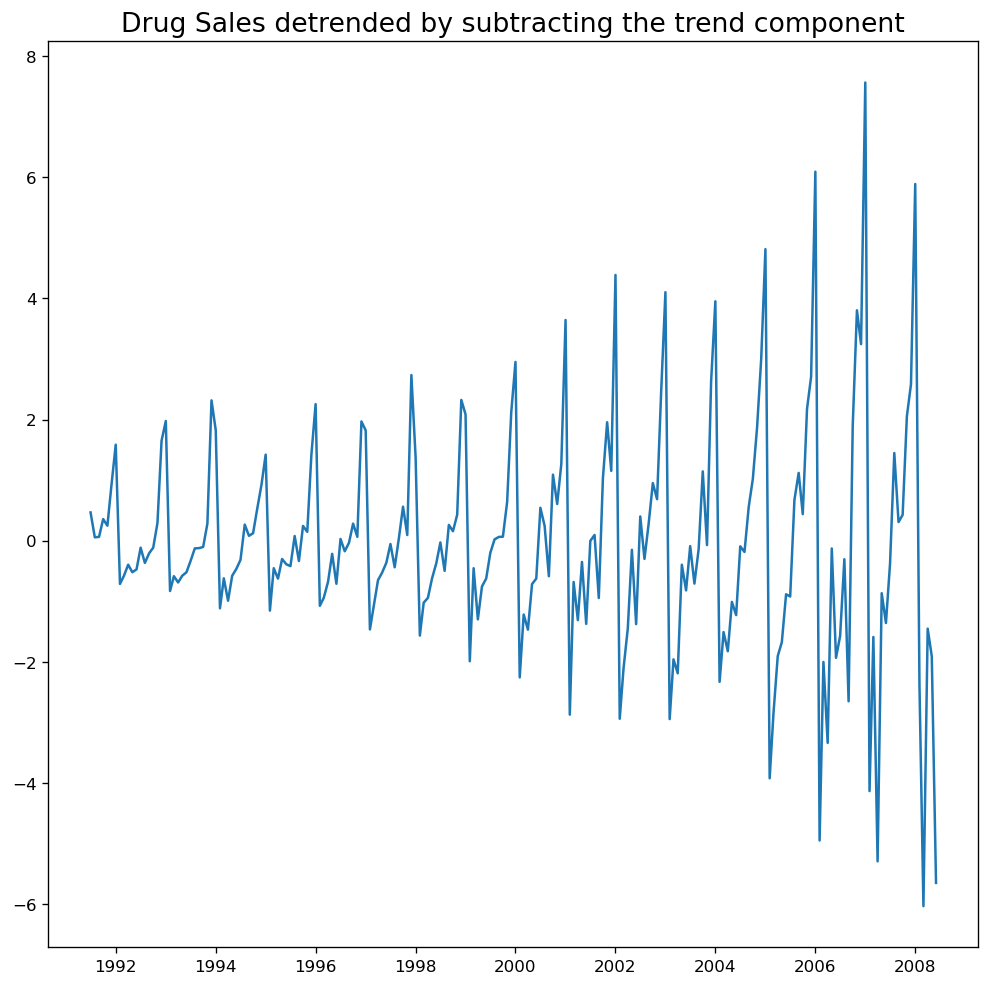

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

In [14]:
"""
13. 怎样对时间序列去季节化?
这里有多种方法对时间序列去季节化。以下就有几个：
1. 取一个以长度为季节窗口的移动平均线。这将在这个过程中使序列变得平滑；
2. 序列季节性差分（从当前值当中减去前一季节的值）；
3. 将序列值除以从STL分解当中获得的季节性指数。
如果除以季节性指数后仍没办法得到良好的结果，再试一下序列对数转换然后再做。你之后可以通过去指数恢复到原始尺度。
"""

'\n13. 怎样对时间序列去季节化?\n这里有多种方法对时间序列去季节化。以下就有几个：\n1. 取一个以长度为季节窗口的移动平均线。这将在这个过程中使序列变得平滑；\n2. 序列季节性差分（从当前值当中减去前一季节的值）；\n3. 将序列值除以从STL分解当中获得的季节性指数。\n如果除以季节性指数后仍没办法得到良好的结果，再试一下序列对数转换然后再做。你之后可以通过去指数恢复到原始尺度。\n'

[]

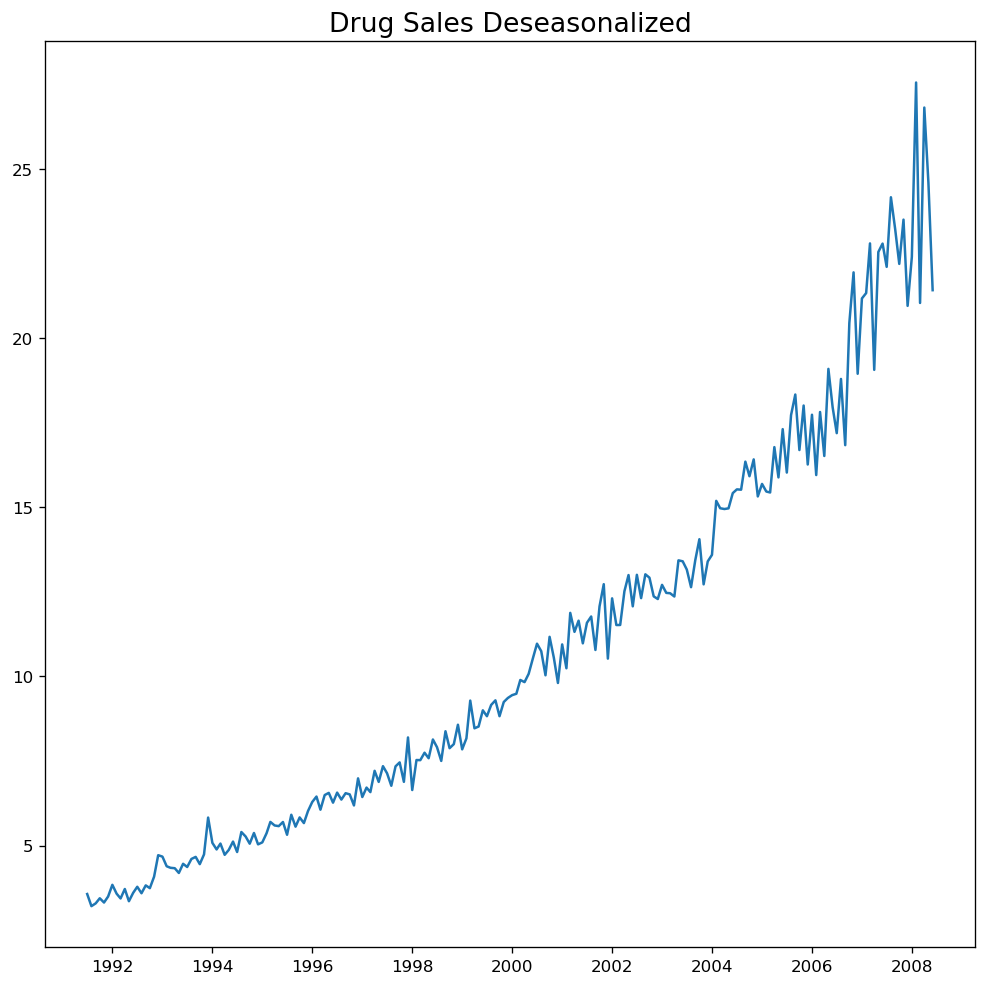

In [15]:
# Subtracting the Trend Component.
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
 
# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
 
# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal
 
# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

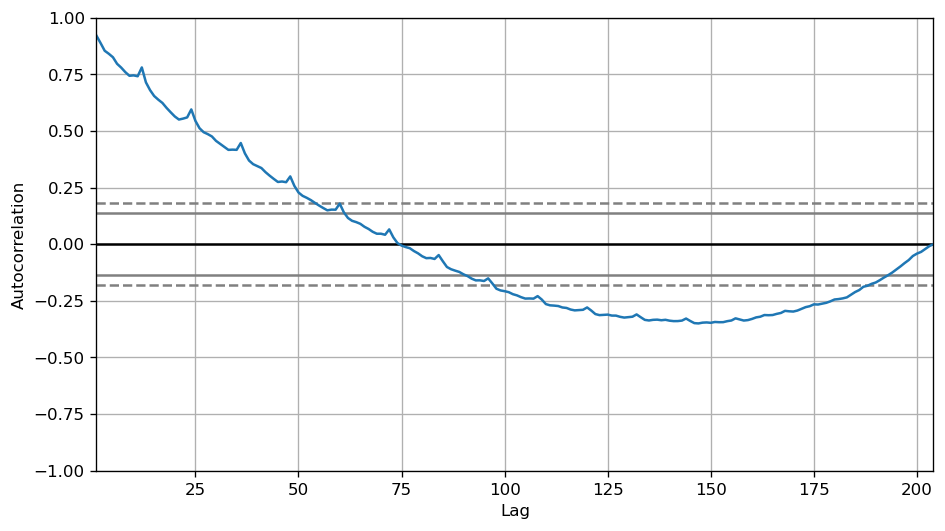

In [16]:
"""
14. 怎样检验时间序列的季节性？
常见的方法是绘制序列并在固定的时间间隔内检查可重复的模式。所以，季节性的类型由钟表或日历决定：
1. 一天的每个小时；
2. 一月的每天；
3. 每周；
4. 每月；
5. 每年。
然而，如果你想要一个更权威的季节性检验，使用自回归函数（ACF）图。更多关于自回归的信息将在下一部分介绍。
但是当强季节性模式出现时，ACF图通常揭示了在季节窗的倍数处明显的重复峰值。
例如，药品销售时间序列是每年都有重复模式的一个月度序列。所以，你可以看到第12,24和36条线等的峰值。
我必须警告你在现实世界的数据集当中，这样强的模式很难见到，并且有可能被各种噪音所扭曲，所以你需要一双仔细的眼睛来捕获这些模式。
"""
from pandas.plotting import autocorrelation_plot
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
 
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())


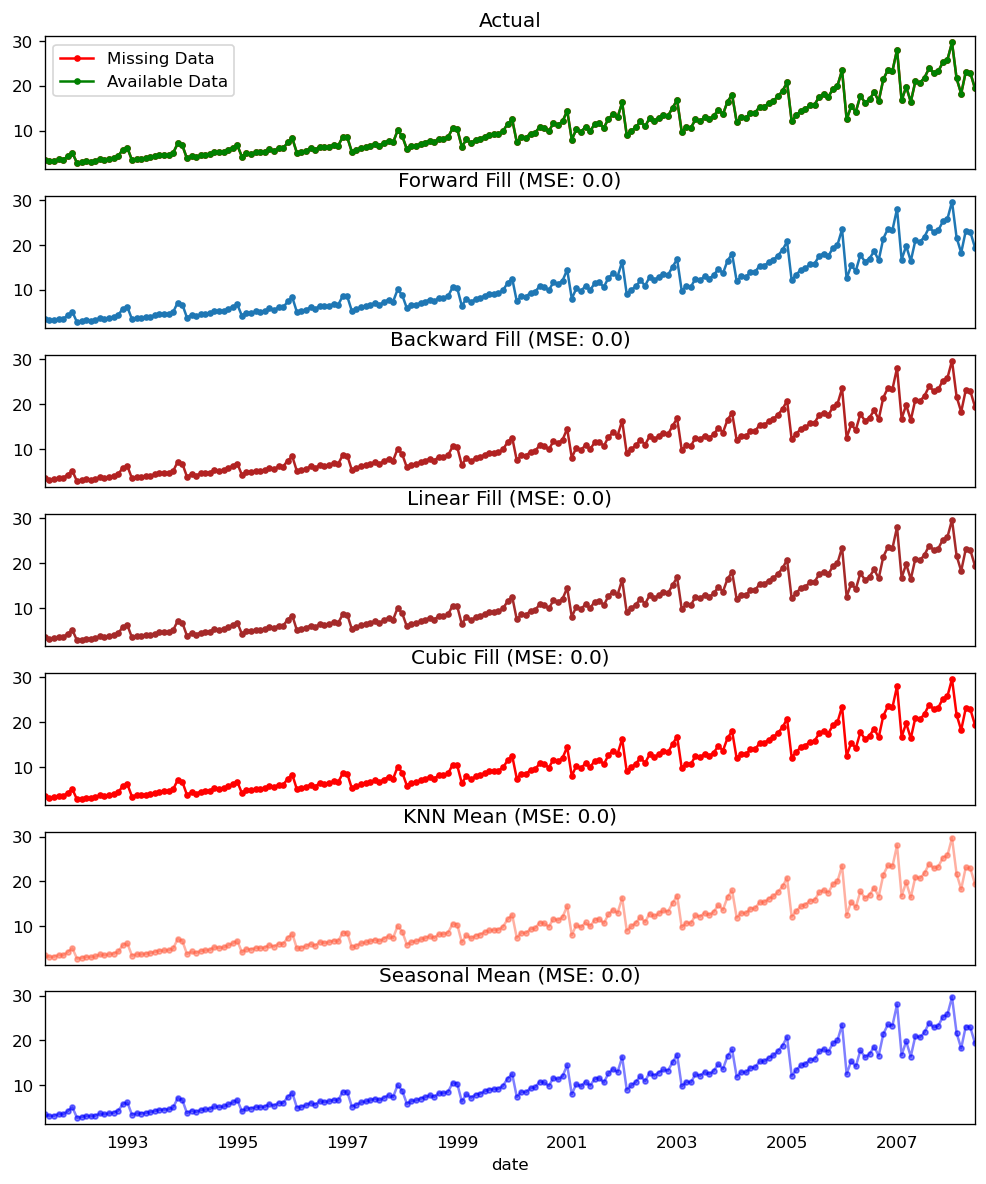

In [18]:
"""
15. 如何处理时间序列当中的缺失值？
有时，你的时间序列会有缺失日期/时间。那意味着，数据没有被捕获或者在那段时间内不可用。那些天的测量值有可能为0，你可以把那些时间段填充0。
其次，当处理时间序列时，你通常不应该用序列均值来替代缺失值，尤其是序列非平稳的时候，一个快捷粗略的处理方法来说你应该做的是向前填充之前的值。
然而，依赖于序列的本质，你想要在得出结论之前尝试多种方法。有效的缺失值处理方法有：
向后填充；
线性内插；
二次内插；
最邻近平均值；
对应季节的平均值。
为了衡量缺失值的表现，我在时间序列当中手动引入缺失值，使用上述方法处理并衡量处理值和真实值之间的均方误差。
"""
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
# df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
# df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')
 
df_orig = df    
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})
 
## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])
 
## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")
 
## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")
 
## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")
 
## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")
 
# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html
 
## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out
 
df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")
 
## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out
 
df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")


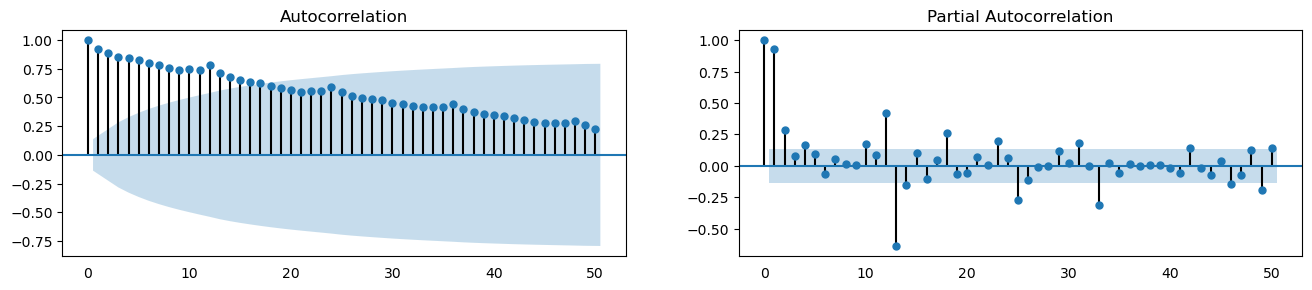

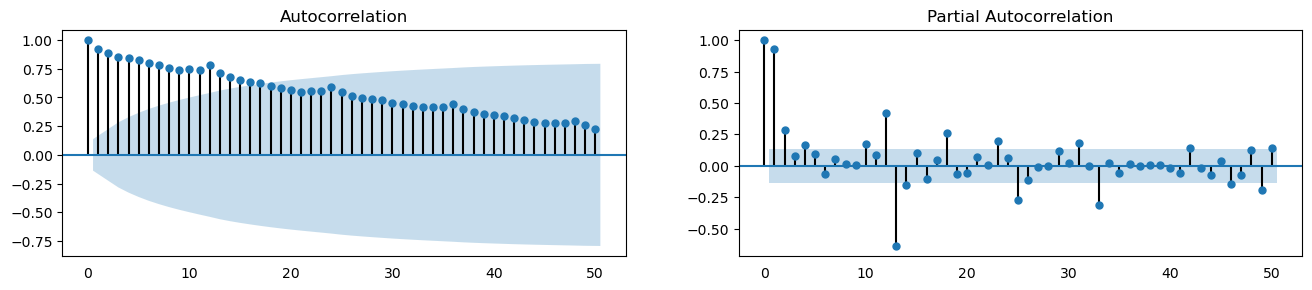

In [19]:
"""
16. 什么是自相关和偏自相关函数？
自相关是序列和自己滞后量的简单相关。如果序列显著自相关，均值和序列之前的值（滞后量）可能对预测当前值有帮助。
偏自相关也会传递相似的信息但是它传递的是序列和它滞后量的纯粹相关，排除了其他中间滞后量对相关的贡献。
"""
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
 
# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)
 
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

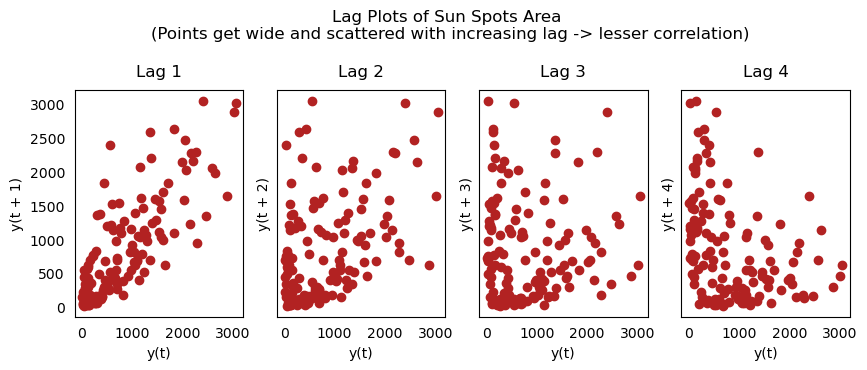

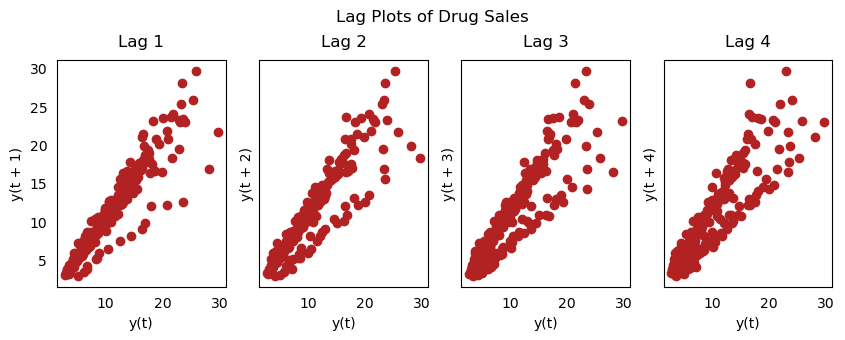

In [21]:
"""
滞后图
滞后图是一个时间序列对其自身滞后量的散点图。它通常用于检查自相关。
如果序列中存在如下所示的任何模式，则该序列是自相关的。如果没有这样的模式，这个序列很可能是随机的白噪声。
在下面太阳黑子面积时间序列的例子当中，随着n_lag增加，图越来越分散。
"""
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
 
# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
 
# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
    
fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    
 
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
    
fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

In [24]:
"""
怎样估计时间序列的预测能力?
时间序列越有规律性和重复性的模式，越容易被预测。“近似熵”可用于量化时间序列波动的规律性和不可预测性。
近似熵越高，预测越难。另一个更好的选项是“样本熵”。
样本熵类似与近似熵，但是在估计小时间序列的复杂性上结果更一致。
例如，较少样本点的随机时间序列 “近似熵”可能比一个更规律的时间序列更低，然而更长的时间序列可能会有一个更高的“近似熵”。
"""
# https://en.wikipedia.org/wiki/Approximate_entropy
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

In [25]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
 
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
 
    N = len(U)
    return abs(_phi(m+1) - _phi(m))
 
print(ApEn(ss.value, m=2, r=0.2*np.std(ss.value)))     # 0.651
print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
 
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)
 
    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))
 
print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value)))      # 0.78
print(SampEn(a10.value, m=2, r=0.2*np.std(a10.value)))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

0.6514704970333534
0.5374775224973489
0.2796602578841032
0.6292156372773379
0.7853311366380039
0.41887013457621214
inf
2.374905754573672


D:\software\Anaconda\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
